In [62]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
folder_path = "../data/dataset_1"

def read_and_combine_csv_files(folder_path):
    data_frames = []

    for file in os.listdir(folder_path):
        if file.lower().endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            data_frames.append(df)

    combined_df = pd.concat(data_frames, ignore_index=True)
    return combined_df

data = read_and_combine_csv_files(folder_path)

In [64]:
data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'Total_Test_Results', 'People_Hospitalized', 'Case_Fatality_Ratio',
       'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate', 'Date',
       'People_Tested', 'Mortality_Rate'],
      dtype='object')

In [65]:
data.head(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2022-01-22 04:32:02  32.3182  -86.9023   
1          Alaska             US  2022-01-22 04:32:02  61.3707 -152.4044   
2  American Samoa             US  2022-01-22 04:32:02 -14.2710 -170.1320   
3         Arizona             US  2022-01-22 04:32:02  33.7298 -111.4312   
4        Arkansas             US  2022-01-22 04:32:02  34.9697  -92.3731   

   Confirmed  Deaths  Recovered  Active  FIPS  ...  Total_Test_Results  \
0    1120881   16824        NaN     NaN   1.0  ...                 NaN   
1     195345    1051        NaN     NaN   2.0  ...           3741734.0   
2         18       0        NaN     NaN  60.0  ...              2140.0   
3    1701949   25502        NaN     NaN   4.0  ...          16792390.0   
4     726716    9484        NaN     NaN   5.0  ...           4709066.0   

   People_Hospitalized  Case_Fatality_Ratio         UID  ISO3   Testing_Rate  \
0                  NaN             1.500962  84000001.0   USA            NaN   
1                  NaN             0.538022  84000002.0   USA  511483.777485   
2                  NaN             0.000000        16.0   ASM    3846.084722   
3                  NaN             1.498400  84000004.0   USA  230705.356452   
4                  NaN             1.305049  84000005.0   USA  156042.804635   

   Hospitalization_Rate        Date People_Tested  Mortality_Rate  
0                   NaN  2022-01-21           NaN             NaN  
1                   NaN  2022-01-21           NaN             NaN  
2                   NaN  2022-01-21           NaN             NaN  
3                   NaN  2022-01-21           NaN             NaN  
4                   NaN  2022-01-21           NaN             NaN  

[5 rows x 21 columns]

In [66]:
data.tail(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
61609       Virginia             US  2021-06-15 04:31:17  37.7693  -78.1700   
61610     Washington             US  2021-06-15 04:31:17  47.4009 -121.4905   
61611  West Virginia             US  2021-06-15 04:31:17  38.4912  -80.9545   
61612      Wisconsin             US  2021-06-15 04:31:17  44.2685  -89.6165   
61613        Wyoming             US  2021-06-15 04:31:17  42.7560 -107.3025   

       Confirmed  Deaths  Recovered  Active  FIPS  ...  Total_Test_Results  \
61609     677812   11318        NaN     NaN  51.0  ...           7553224.0   
61610     444722    5782        NaN     NaN  53.0  ...           7358062.0   
61611     163144    2853        NaN     NaN  54.0  ...           2972502.0   
61612     676276    8015        NaN     NaN  55.0  ...           8893572.0   
61613      61234     725        NaN     NaN  56.0  ...            770872.0   

       People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  \
61609                  NaN             1.669785  84000051.0   USA   
61610                  NaN             1.300138  84000053.0   USA   
61611                  NaN             1.748762  84000054.0   USA   
61612                  NaN             1.185167  84000055.0   USA   
61613                  NaN             1.183983  84000056.0   USA   

        Testing_Rate  Hospitalization_Rate        Date People_Tested  \
61609   88491.678128                   NaN  2021-06-14           NaN   
61610   96627.253988                   NaN  2021-06-14           NaN   
61611  165862.621760                   NaN  2021-06-14           NaN   
61612       0.000015                   NaN  2021-06-14           NaN   
61613  133193.954651                   NaN  2021-06-14           NaN   

       Mortality_Rate  
61609             NaN  
61610             NaN  
61611             NaN  
61612             NaN  
61613             NaN  

[5 rows x 21 columns]

From the columns above, we can see that each row describes different covid-related information for one day in one state in the US. The scope of the data is all of the US.

In [67]:
# Convert Date-field to datetime and sort data by Date
data['Date'] = pd.to_datetime(data['Date'])
print(type(data.Date[0]))
data = data.sort_values(by="Date")
data

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Province_State Country_Region          Last_Update      Lat     Long_  \
20762   South Dakota             US  2020-04-12 23:18:15  44.2998  -99.4388   
20741      Minnesota             US  2020-04-12 23:18:15  45.6945  -93.9002   
20740       Michigan             US  2020-04-12 23:18:15  43.3266  -84.5361   
20739  Massachusetts             US  2020-04-12 23:18:15  42.2302  -71.5301   
20738       Maryland             US  2020-04-12 23:18:15  39.0639  -76.8021   
...              ...            ...                  ...      ...       ...   
60737       Virginia             US  2022-10-20 04:31:57  37.7693  -78.1700   
60738     Washington             US  2022-10-20 04:31:57  47.4009 -121.4905   
60739  West Virginia             US  2022-10-20 04:31:57  38.4912  -80.9545   
60740      Wisconsin             US  2022-10-20 04:31:57  44.2685  -89.6165   
60741        Wyoming             US  2022-10-20 04:31:57  42.7560 -107.3025   

       Confirmed  Deaths  Recovered   Active  FIPS  ...  Total_Test_Results  \
20762        730       6      197.0    527.0  46.0  ...              8678.0   
20741       1621      70      842.0    709.0  27.0  ...                 NaN   
20740      24244    1479      433.0  22332.0  26.0  ...             97593.0   
20739      25475     756        NaN      NaN  25.0  ...            139881.0   
20738       8225     236      456.0   7533.0  24.0  ...             54664.0   
...          ...     ...        ...      ...   ...  ...                 ...   
60737    2107801   22077        NaN      NaN  51.0  ...                 NaN   
60738    1830508   14493        NaN      NaN  53.0  ...                 NaN   
60739     605322    7479        NaN      NaN  54.0  ...                 NaN   
60740    1885519   15379        NaN      NaN  55.0  ...                 NaN   
60741     178032    1906        NaN      NaN  56.0  ...                 NaN   

       People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  \
20762                 43.0                  NaN  84000046.0   USA   
20741                361.0                  NaN  84000027.0   USA   
20740               3636.0                  NaN  84000026.0   USA   
20739               2235.0                  NaN  84000025.0   USA   
20738               1860.0                  NaN  84000024.0   USA   
...                    ...                  ...         ...   ...   
60737                  NaN             1.047395  84000051.0   USA   
60738                  NaN             0.791747  84000053.0   USA   
60739                  NaN             1.235541  84000054.0   USA   
60740                  NaN             0.815637  84000055.0   USA   
60741                  NaN             1.070594  84000056.0   USA   

       Testing_Rate  Hospitalization_Rate       Date People_Tested  \
20762  9.809429e-08              5.890411 2020-04-12        8553.0   
20741  7.565230e+02             22.270204 2020-04-12       37421.0   
20740  9.772144e-08             14.997525 2020-04-12       79437.0   
20739  2.029466e-07              8.773307 2020-04-12      116730.0   
20738  9.041828e-08             22.613982 2020-04-12       49764.0   
...             ...                   ...        ...           ...   
60737           NaN                   NaN        NaT           NaN   
60738           NaN                   NaN        NaT           NaN   
60739           NaN                   NaN        NaT           NaN   
60740           NaN                   NaN        NaT           NaN   
60741           NaN                   NaN        NaT           NaN   

       Mortality_Rate  
20762        0.821918  
20741        4.318322  
20740        6.100478  
20739        2.967615  
20738        2.869301  
...               ...  
60737             NaN  
60738             NaN  
60739             NaN  
60740             NaN  
60741             NaN  

[61614 rows x 21 columns]

See that some rows are missing the Date field. Remove these rows, as they will be hard to work with. Also notice weird Province_State "Recovered". Remove this.

In [68]:
# Remove all rows with missing Last_Update field
data = data.dropna(subset=["Date"])
data = data[data['Province_State'] != 'Recovered']
data = data.reset_index()
data = data.drop(columns=["index"])
data

Province_State Country_Region          Last_Update      Lat     Long_  \
0        South Dakota             US  2020-04-12 23:18:15  44.2998  -99.4388   
1           Minnesota             US  2020-04-12 23:18:15  45.6945  -93.9002   
2            Michigan             US  2020-04-12 23:18:15  43.3266  -84.5361   
3       Massachusetts             US  2020-04-12 23:18:15  42.2302  -71.5301   
4            Maryland             US  2020-04-12 23:18:15  39.0639  -76.8021   
...               ...            ...                  ...      ...       ...   
51731   Massachusetts             US  2022-09-21 04:33:22  42.2302  -71.5301   
51732        Michigan             US  2022-09-21 04:33:22  43.3266  -84.5361   
51733     Mississippi             US  2022-09-21 04:33:22  32.7416  -89.6787   
51734         Montana             US  2022-09-21 04:33:22  46.9219 -110.4544   
51735  American Samoa             US  2022-09-21 04:33:22 -14.2710 -170.1320   

       Confirmed  Deaths  Recovered   Active  FIPS  ...  Total_Test_Results  \
0            730       6      197.0    527.0  46.0  ...              8678.0   
1           1621      70      842.0    709.0  27.0  ...                 NaN   
2          24244    1479      433.0  22332.0  26.0  ...             97593.0   
3          25475     756        NaN      NaN  25.0  ...            139881.0   
4           8225     236      456.0   7533.0  24.0  ...             54664.0   
...          ...     ...        ...      ...   ...  ...                 ...   
51731    2030335   21588        NaN      NaN  25.0  ...          47257622.0   
51732    2821489   38464        NaN      NaN  26.0  ...          26100751.0   
51733     925596   12879        NaN      NaN  28.0  ...                 NaN   
51734     308023    3512        NaN      NaN  30.0  ...           3073045.0   
51735       8217      34        NaN      NaN  60.0  ...                 NaN   

       People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  \
0                     43.0                  NaN  84000046.0   USA   
1                    361.0                  NaN  84000027.0   USA   
2                   3636.0                  NaN  84000026.0   USA   
3                   2235.0                  NaN  84000025.0   USA   
4                   1860.0                  NaN  84000024.0   USA   
...                    ...                  ...         ...   ...   
51731                  NaN             1.063273  84000025.0   USA   
51732                  NaN             1.363252  84000026.0   USA   
51733                  NaN             1.391428  84000028.0   USA   
51734                  NaN             1.140175  84000030.0   USA   
51735                  NaN             0.413776        16.0   ASM   

       Testing_Rate  Hospitalization_Rate       Date People_Tested  \
0      9.809429e-08              5.890411 2020-04-12        8553.0   
1      7.565230e+02             22.270204 2020-04-12       37421.0   
2      9.772144e-08             14.997525 2020-04-12       79437.0   
3      2.029466e-07              8.773307 2020-04-12      116730.0   
4      9.041828e-08             22.613982 2020-04-12       49764.0   
...             ...                   ...        ...           ...   
51731  6.856380e+05                   NaN 2022-09-20           NaN   
51732  2.613510e+05                   NaN 2022-09-20           NaN   
51733           NaN                   NaN 2022-09-20           NaN   
51734  2.875288e+05                   NaN 2022-09-20           NaN   
51735           NaN                   NaN 2022-09-20           NaN   

       Mortality_Rate  
0            0.821918  
1            4.318322  
2            6.100478  
3            2.967615  
4            2.869301  
...               ...  
51731             NaN  
51732             NaN  
51733             NaN  
51734             NaN  
51735             NaN  

[51736 rows x 21 columns]

See from the table above that the cleaned data stretches from 04-12-2020 to 09-20-2022.

Since the rows in the dataset are missing so many fields, will focus on the fields that are mostly present, i.e., Confirmed and Deaths.

In [69]:
state_date_confirmed_deaths = data[["Province_State", "Date", "Confirmed", "Deaths"]]

In [70]:
# Aggregate total confirmed cases by state:
state_confirmed_deaths_sum = state_date_confirmed_deaths.groupby(by="Province_State").sum()

Start by looking at mortality rates for each state

In [71]:
state_confirmed_deaths_sum["Mortality_rate"] = 100 * state_confirmed_deaths_sum["Deaths"] / state_confirmed_deaths_sum["Confirmed"]
state_confirmed_deaths_sum = state_confirmed_deaths_sum.sort_values(by="Mortality_rate")
state_confirmed_deaths_sum 


Confirmed    Deaths  Mortality_rate
Province_State                                                
Diamond Princess               43708         0        0.000000
Northern Mariana Islands     2875225     10011        0.348181
American Samoa               1200373      5058        0.421369
Alaska                     101650799    507180        0.498943
Utah                       429631845   2244510        0.522426
Vermont                     42937292    283907        0.661213
Hawaii                      91202861    624846        0.685117
Virgin Islands               6698778     49640        0.741031
Nebraska                   226388329   2099510        0.927393
Guam                        17012320    163010        0.958188
Wisconsin                  735428254   7084691        0.963342
Puerto Rico                228264722   2214139        0.969987
Washington                 606784869   6132301        1.010622
New Hampshire              123005194   1251763        1.017651
Minnesota                  648649975   6685090        1.030616
Maine                       92114015    951233        1.032669
North Carolina            1162341940  12066443        1.038115
Colorado                   630987904   6601690        1.046247
Oregon                     292293452   3209382        1.098000
North Dakota               114073147   1265664        1.109520
Idaho                      205873086   2285391        1.110097
Wyoming                     70645802    805917        1.140785
California                4179747324  48793399        1.167377
Kentucky                   564482547   6919563        1.225824
Kansas                     349104605   4355379        1.247586
Montana                    123764057   1580029        1.276646
Tennessee                  938982730  12104031        1.289058
Virginia                   756938669   9905298        1.308600
Delaware                   117570230   1545065        1.314163
Rhode Island               162606487   2180197        1.340781
South Dakota               117793021   1584388        1.345061
Iowa                       371570534   5038768        1.356073
South Carolina             662835235   8991823        1.356570
Florida                   2733912070  37250643        1.362540
Missouri                   665744913   9554359        1.435138
Texas                     3176705943  45693329        1.438387
Arkansas                   383762195   5575082        1.452744
West Virginia              206641603   3003427        1.453447
Oklahoma                   480053001   7002762        1.458748
Illinois                  1456298233  21348436        1.465938
District of Columbia        60898267    900315        1.478392
Nevada                     340536514   5259313        1.544420
Indiana                    786120475  12259939        1.559550
Ohio                      1210175022  19099634        1.578254
Georgia                   1193146414  19208693        1.609919
New Mexico                 231707331   3769600        1.626880
Alabama                    605688100   9878713        1.630990
Massachusetts              770811415  12593080        1.633743
Arizona                    930945974  15332167        1.646945
Maryland                   482201114   8112266        1.682341
Louisiana                  571901294   9868722        1.725599
Michigan                  1058228434  18660664        1.763387
Mississippi                369484927   6687009        1.809819
Pennsylvania              1260979346  23636620        1.874465
New York                  2289856571  45266861        1.976843
Connecticut                348127139   6917448        1.987046
New Jersey                1044751935  21955594        2.101513
Grand Princess                 91876      2643        2.876703

See from the table above that mortality rates ranges all the way from 0% to ≈ 2.9 percent during the pandemic for different Province_States. Plot the highest and lowest mortality rates below.

Text(0.5, 1.0, '3 Lowest Total Mortality Rates by Province_State')

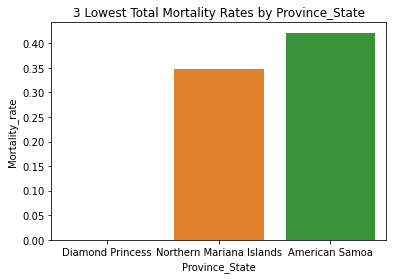

In [72]:
plot_order = state_confirmed_deaths_sum.index.values

# Lowest mortality rates
sns.barplot(x = state_confirmed_deaths_sum.index, y = state_confirmed_deaths_sum["Mortality_rate"], order=plot_order[0:3])
plt.title("3 Lowest Total Mortality Rates by Province_State")

Text(0.5, 1.0, '3 Highest Total Mortality Rates by Province_State')

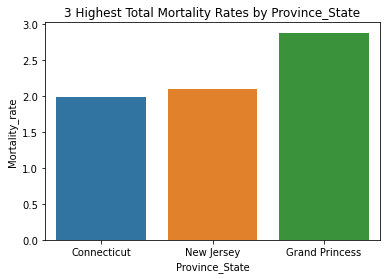

In [73]:
# Highest mortality rates
sns.barplot(x = state_confirmed_deaths_sum.index, y = state_confirmed_deaths_sum["Mortality_rate"], order=plot_order[-3:len(state_confirmed_deaths_sum)])
plt.title("3 Highest Total Mortality Rates by Province_State")

Next, look at the progression of combined mortality rates for all states

Text(0.5, 1.0, 'Trend of Mortality Rate for the US')

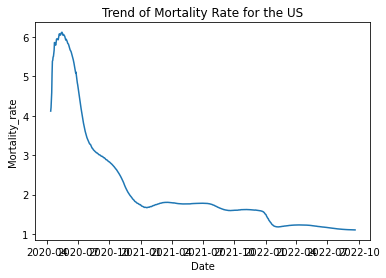

In [74]:
date_mortality_rate = state_date_confirmed_deaths.groupby(by="Date").agg(sum)
date_mortality_rate["Mortality_rate"] = 100 * date_mortality_rate["Deaths"] / date_mortality_rate["Confirmed"]
date_mortality_rate = date_mortality_rate.drop(columns=["Confirmed", "Deaths"]).reset_index()

sns.lineplot(data=date_mortality_rate, x="Date", y="Mortality_rate")
plt.title("Trend of Mortality Rate for the US")


See from the lineplot above that the mortality rate in the US first increase for each confirmed case, peaking aorund 6 deaths per 100 confirmed cases. It then start drasticly decreasing, and continue to slightly decrease to right above 1 deaths per 100 confirmed cases by the end of measurement.

In [75]:
date_mortality_rate.loc[date_mortality_rate["Mortality_rate"].idxmax()]

Date              2020-05-15 00:00:00
Mortality_rate               6.122871
Name: 33, dtype: object

The peak was reached on 05-15-2020 with an exact mortality rate of 6.122871.